In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [96]:
notebook_dir = Path(os.getcwd())
os.chdir(notebook_dir)
print(notebook_dir)

c:\Users\JessieDong\OneDrive - New Zealand Council for Educational Research\Documents\Personal\AIML501-589\NZQA project code\NZQA


In [97]:
# Load the data
pred_path = "output/predictions/multiviewv10/"
save_path = "output/analysis/"
data_path = "data/nzqa/"
dt_round = pd.read_csv(pred_path+"test_Q1_multiviewv10_seed289.csv")
dt_float = pd.read_csv(pred_path+"test_Q1_multiviewv10_seed289_float.csv")
dt = pd.merge(dt_round, dt_float, on="Unique_ID")

dt1_round = pd.read_csv(pred_path+"test_Q2_multiviewv10_seed289.csv")
dt1_float = pd.read_csv(pred_path+"test_Q2_multiviewv10_seed289_float.csv")
dt1 = pd.merge(dt1_round, dt1_float, on="Unique_ID")

In [40]:
#dt

In [16]:
# dt = dt.drop(columns=['total_true','total_pred'])
# dt1 = dt1.drop(columns=['total_true','total_pred'])
# dt.to_csv("S1Q1_scores_final")
# dt1.to_csv("S1Q2_scores_final")

In [41]:
dt.shape

(346, 16)

In [141]:
def get_stats(dt, question,columns):
    n = dt.shape[0]
    results = pd.DataFrame(columns=[
        "Essay", "Rubric", "N", "Exact", "Adj", "Exact+Adj", "Off2", "SDsc", 
        "Pearson", "Kappa", "QWKappa", "MAE", "Accuracy","Matthews", "mean_machine", 
        "sd_machine", "mean_true", "sd_true", "effect_size"
    ])

    for col in columns:
        # Exact matches
        exact = round((abs(dt[f'{col}_pred'] - dt[f'{col}_true']) == 0).sum() / n, 3)
        
        # Adjacent matches
        adj = round((abs(dt[f'{col}_pred'] - dt[f'{col}_true']) == 1).sum() / n, 3)
        
        # Off2
        off2 = round((abs(dt[f'{col}_pred'] - dt[f'{col}_true']) == 2).sum() / n, 3)
        
        # SDsc
        sdsc = round((abs(dt[f'{col}_pred'] - dt[f'{col}_true']) > 2).sum() / n, 3)
        
        # Pearson correlation
        pearson = round(pearsonr(dt[f'{col}_pred'], dt[f'{col}_true'])[0], 3)
        
        # Cohen's Kappa
        kappa = round(cohen_kappa_score(dt[f'{col}_pred'], dt[f'{col}_true']), 3)
        
        # Quadratic Weighted Kappa
        quad_weighted_kappa = round(cohen_kappa_score(dt[f'{col}_pred'], dt[f'{col}_true'], weights='quadratic'), 3)

        # mean absolute error
        mae = round(mean_absolute_error(dt[f'{col}_pred'], dt[f'{col}_true']), 3)

        # Accuracy
        accuracy = round((dt[f'{col}_pred'] == dt[f'{col}_true']).sum() / n, 3)

        # Matthews correlation coefficient
        matthew = round(matthews_corrcoef(dt[f'{col}_pred'], dt[f'{col}_true']), 3)
        
        # Mean and std for machine score
        mean_machine = round(dt[f'{col}_pred'].mean(), 3)
        std_machine = round(dt[f'{col}_pred'].std(), 3)
        
        # Mean and std for true score
        mean_true = round(dt[f'{col}_true'].mean(), 3)
        std_true = round(dt[f'{col}_true'].std(), 3)
        
        # Effect size
        effect = round((mean_machine - mean_true) / np.sqrt((std_machine**2 + std_true**2) / 2), 3)
        
        # Create a dataframe with the results
        result = pd.DataFrame({
            "Essay": [question],
            "Rubric": [col],
            "N": [n],
            "Exact": [exact],
            "Adj": [adj],
            "Exact+Adj": [exact + adj],
            "Off2": [off2],
            "SDsc": [sdsc],
            "Pearson": [pearson],
            "Kappa": [kappa],
            "QWKappa": [quad_weighted_kappa],
            "MAE": [mae],
            "Accuracy": [accuracy],
            "Matthews": [matthew],
            "mean_machine": [mean_machine],
            "sd_machine": [std_machine],
            "mean_true": [mean_true],
            "sd_true": [std_true],
            "effect_size": [effect]
        })
        results = pd.concat([results, result], ignore_index=True)
    
    return results




In [136]:
columns = ['AC', 'CO', 'LA', 'ST']
stats = get_stats(dt,"S2Q1",columns)
stats.to_csv(save_path + "S2Q1_stats_multiview.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2   SDsc  Pearson  Kappa  \
0  S2Q1     AC  346  0.694  0.303      0.997  0.003  0.000    0.696  0.472   
1  S2Q1     CO  346  0.697  0.292      0.989  0.009  0.003    0.636  0.374   
2  S2Q1     LA  346  0.769  0.225      0.994  0.003  0.003    0.692  0.435   
3  S2Q1     ST  346  0.740  0.257      0.997  0.000  0.003    0.683  0.402   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.687  0.309     0.694     0.476         2.694       0.709      2.581   
1    0.617  0.318     0.697     0.396         2.913       0.626      2.769   
2    0.675  0.240     0.769     0.456         2.945       0.595      2.827   
3    0.664  0.266     0.740     0.425         2.936       0.601      2.809   

   sd_true  effect_size  
0    0.702        0.160  
1    0.713        0.215  
2    0.667        0.187  
3    0.684        0.197  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [137]:
columns = ['AC', 'CO', 'LA', 'ST']
stats1 = get_stats(dt1, "S2Q2", columns)
stats1.to_csv(save_path + "S2Q2_stats_multiview.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2   SDsc  Pearson  Kappa  \
0  S2Q1     AC  346  0.694  0.303      0.997  0.003  0.000    0.696  0.472   
1  S2Q1     CO  346  0.697  0.292      0.989  0.009  0.003    0.636  0.374   
2  S2Q1     LA  346  0.769  0.225      0.994  0.003  0.003    0.692  0.435   
3  S2Q1     ST  346  0.740  0.257      0.997  0.000  0.003    0.683  0.402   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.687  0.309     0.694     0.476         2.694       0.709      2.581   
1    0.617  0.318     0.697     0.396         2.913       0.626      2.769   
2    0.675  0.240     0.769     0.456         2.945       0.595      2.827   
3    0.664  0.266     0.740     0.425         2.936       0.601      2.809   

   sd_true  effect_size  
0    0.702        0.160  
1    0.713        0.215  
2    0.667        0.187  
3    0.684        0.197  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [46]:

def generate_plots(dt, titles, columns, figsize=(12, 18)):
    # Define the subplots layout
    fig, axes = plt.subplots(6, 4, figsize=figsize)

    # Generate confusion matrices for each subplot
    for ax, title, col in zip(axes[0], titles, columns):
        y_true = dt[f'{col}_true']
        predictions = dt[f'{col}_pred']
        cm = confusion_matrix(y_true, predictions, labels=[x for x in range(0, 5)])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[x for x in range(0, 5)])
        disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
        ax.set_title(title)
        ax.set_xlabel("Predicted score")
        ax.set_ylabel("True score")

    # Generate regression output for each subplot and fix a line of best fit
    for ax, title, col in zip(axes[1], titles, columns):
        ax.scatter(x=dt[f'{col}_true'], y=dt[f'{col}_pred_float'])
        m, b = np.polyfit(dt[f'{col}_true'], dt[f'{col}_pred_float'], 1)
        ax.plot(dt[f'{col}_true'], m*dt[f'{col}_true'] + b, color='red')
        ax.set_xlabel('True score')
        ax.set_ylabel('Predicted score')
        ax.set_title(f'Scatter Plot {title}')
    
    # Generate violin plots for each subplot  and change the violin color to light blue
    for ax, title, col in zip(axes[2], titles, columns):
        sns.violinplot(x=dt[f'{col}_true'], y=dt[f'{col}_pred_float'], ax=ax, color='lightblue')
        ax.set_title(f"Violin Plot {title}")
        ax.set_xlabel("True Score")
        ax.set_ylabel("Predicted Score")
    
    # Generate boxplot for each subplot
    for ax, title, col in zip(axes[3],titles,columns):
        sns.boxplot(x=dt[f'{col}_true'], y=dt[f'{col}_pred_float'], ax=ax)
        ax.set_title(f"Box Plot {title}")
        ax.set_xlabel("True Score")
        ax.set_ylabel("Predicted Score")

    # Generate histograms for true scores in the first row
    for ax, title, col in zip(axes[4], titles, columns):
        y_true = dt[f'{col}_true']
        sns.histplot(y_true, bins=5, discrete=True, kde=False, color='green', ax=ax, alpha=0.7)
        ax.set_title(f"True Scores: {title}")
        ax.set_xlabel("Score")
        ax.set_ylabel("Frequency")

    # Generate histograms for predicted scores in the second row
    for ax, title, col in zip(axes[5], titles, columns):
        predictions = dt[f'{col}_pred']
        sns.histplot(predictions, bins=5, discrete=True, kde=False, color='blue', ax=ax, alpha=0.7)
        ax.set_title(f"Machine Scores: {title}")
        ax.set_xlabel("Score")
        ax.set_ylabel("Frequency")

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()



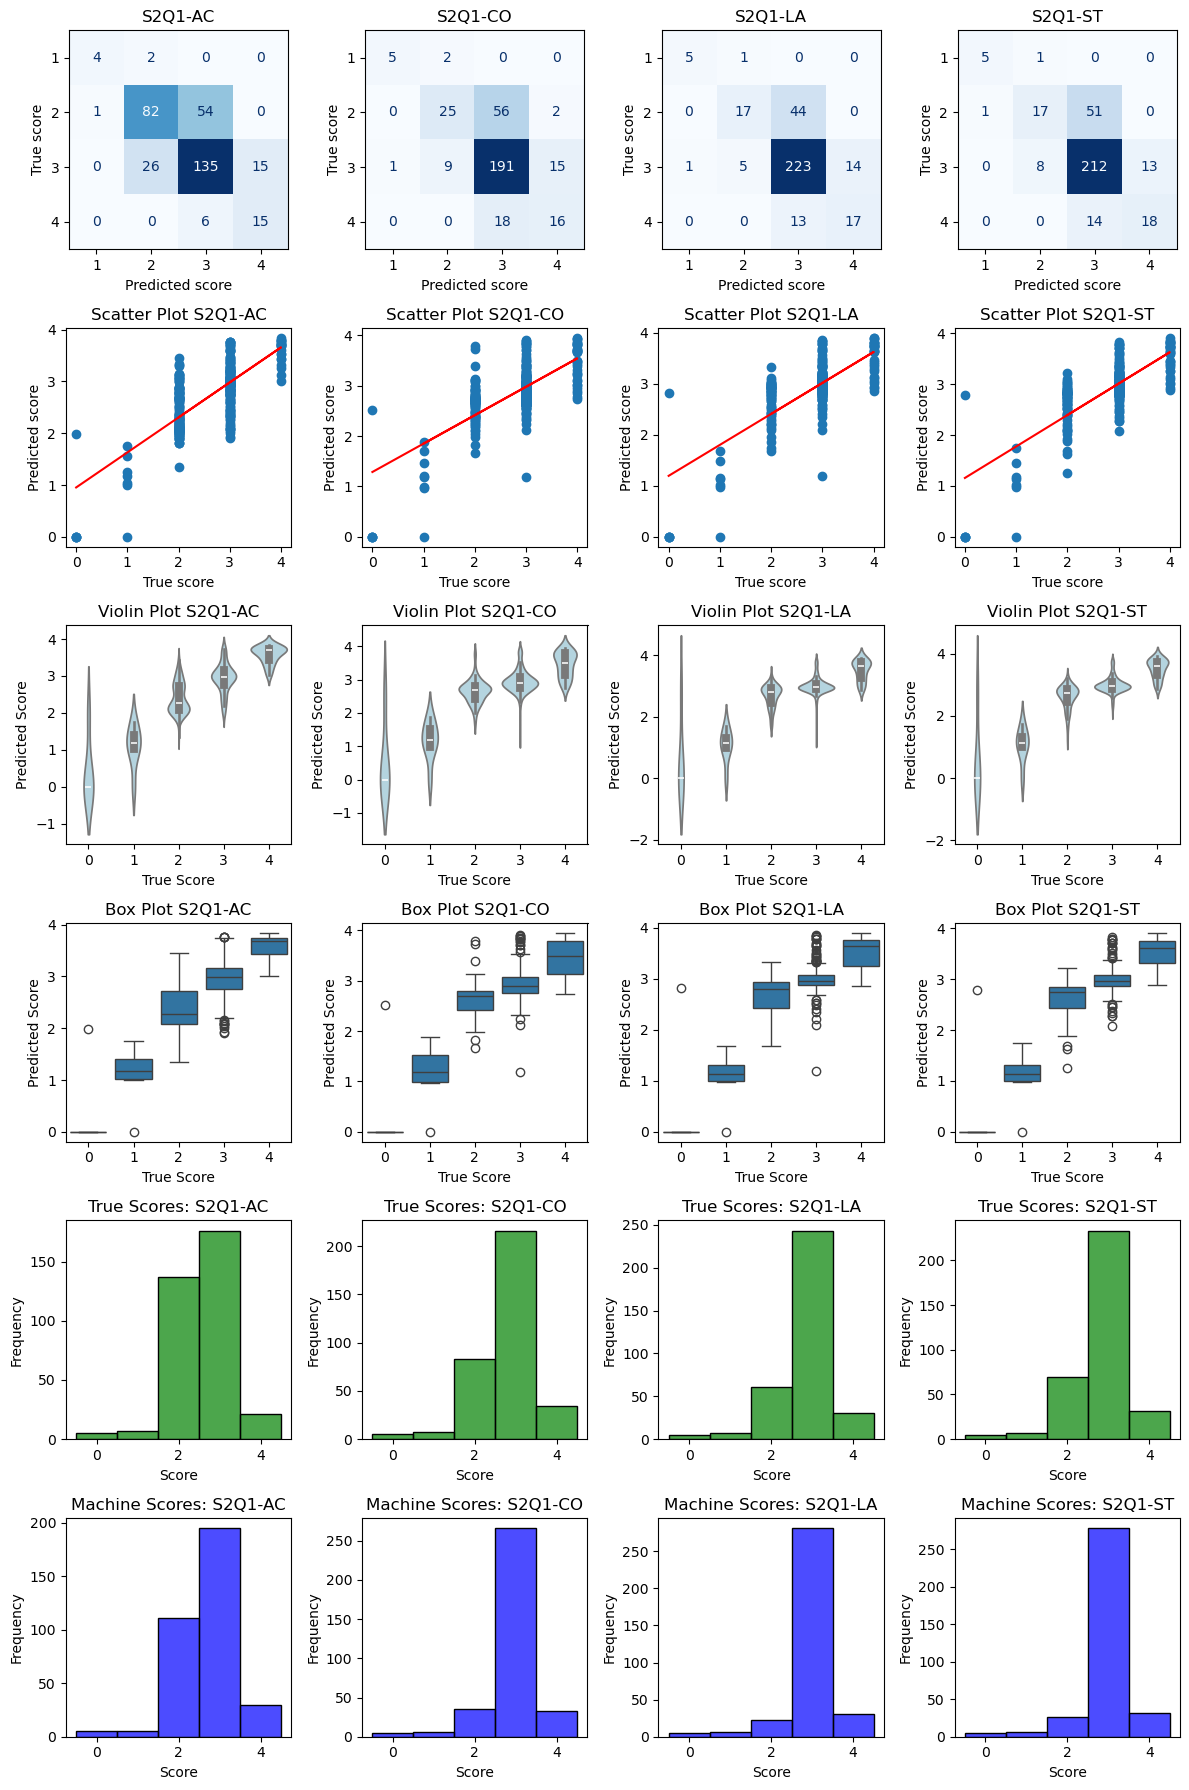

In [75]:

titles = ["S2Q1-AC", "S2Q1-CO", "S2Q1-LA", "S2Q1-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt, titles, columns)

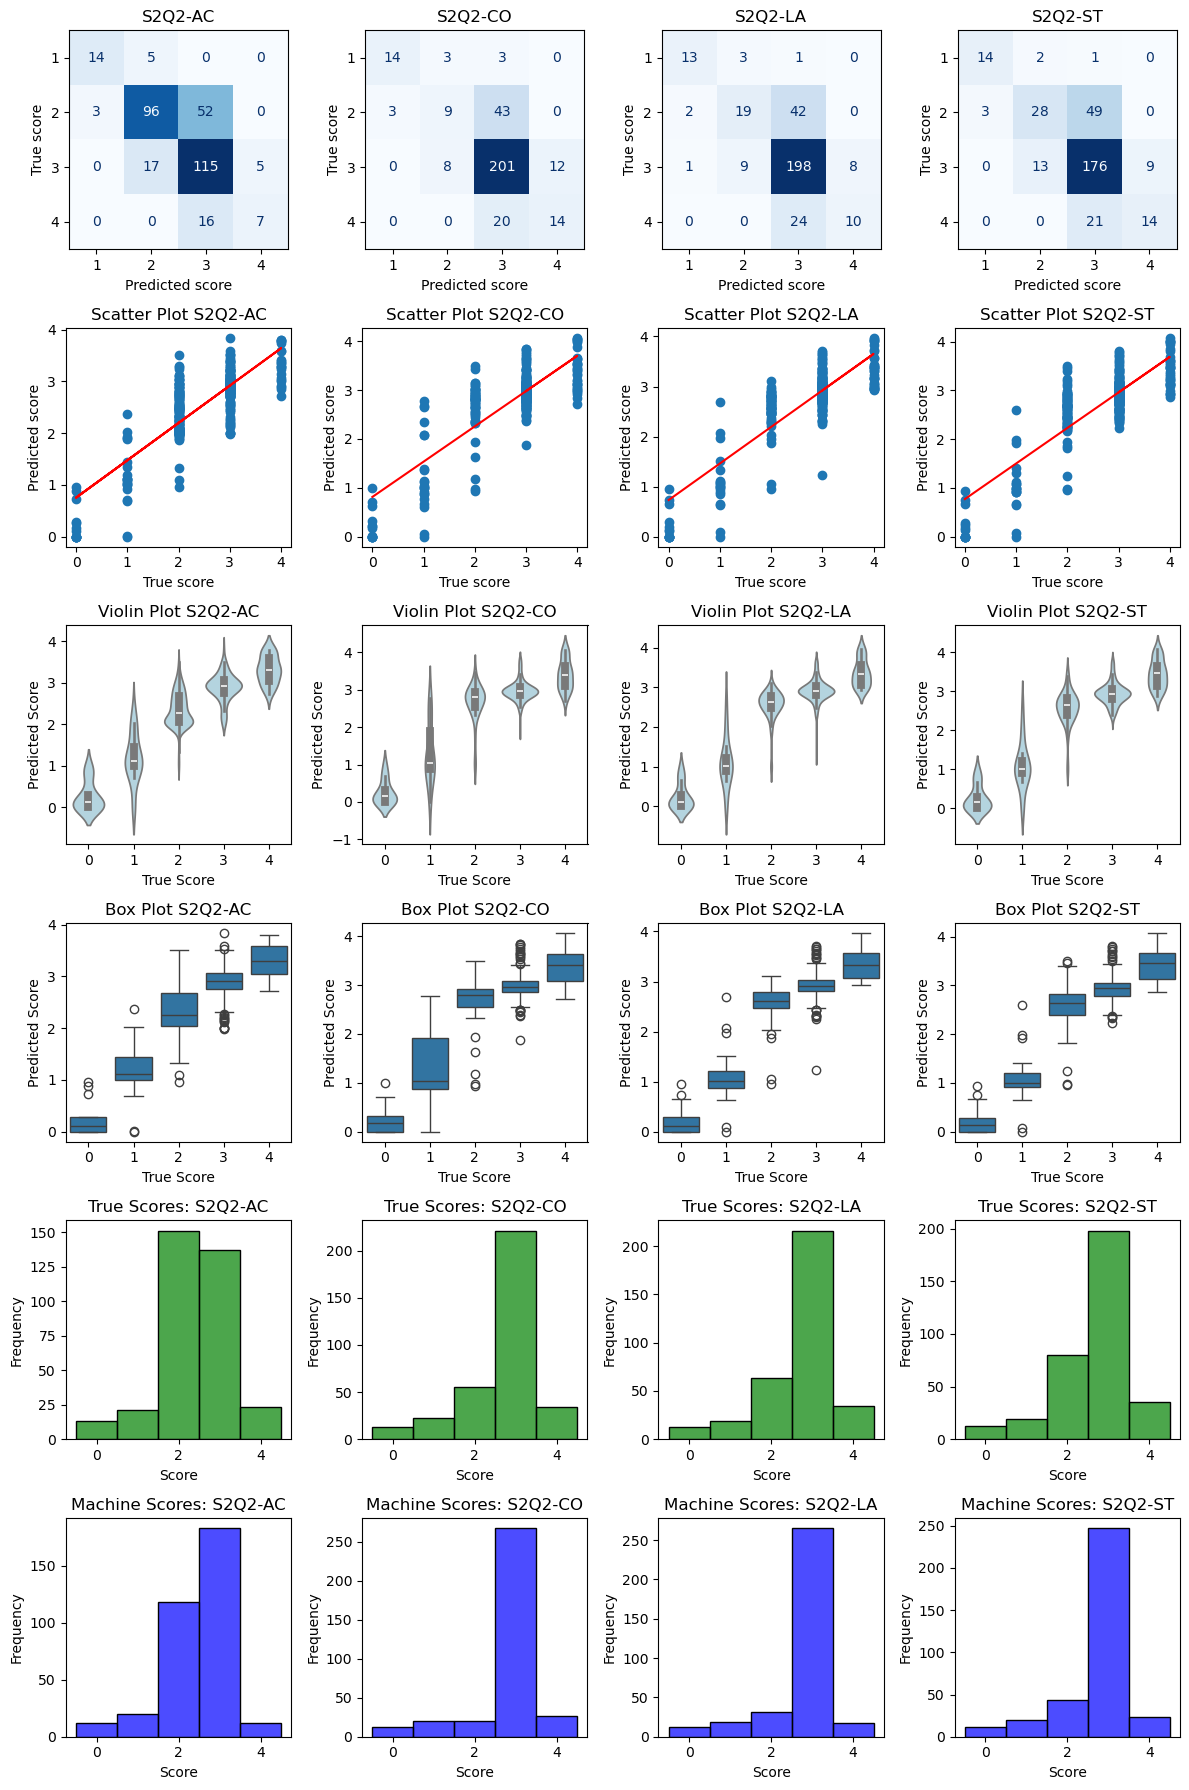

In [77]:
titles = ["S2Q2-AC", "S2Q2-CO", "S2Q2-LA", "S2Q2-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt1, titles, columns)

In [108]:
# analyse the baseline-multi-output model performance

dt_baseline_multi = pd.read_csv("output/predictions/bert-multi/test_Q1_bertbasev1_seed589.csv")
dt_baseline1_multi = pd.read_csv("output/predictions/bert-multi/test_Q2_bertbasev1_seed589.csv")
dt_baseline_float = pd.read_csv("output/predictions/bert-multi/test_Q1_bertbasev1_seed589_float.csv")
dt_baseline1_float = pd.read_csv("output/predictions/bert-multi/test_Q2_bertbasev1_seed589_float.csv")

#dt_baseline = pd.merge(dt_baseline, dt_baseline_float, on="Unique_ID")
#dt_baseline1 = pd.merge(dt_baseline1, dt_baseline1_float, on="Unique_ID")


In [135]:
#get the stats
columns = ['AC', 'CO', 'LA', 'ST']
stats_bert_multi = get_stats(dt_baseline_multi, "S2Q1",columns)
stats_bert_multi.to_csv(save_path + "S2Q1_stats_bert_multi.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [134]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST']
stats_bert_multi1 = get_stats(dt_baseline1_multi,"S2Q2", columns)
stats_bert_multi1.to_csv(save_path + "S2Q2_stats_bert_multi.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


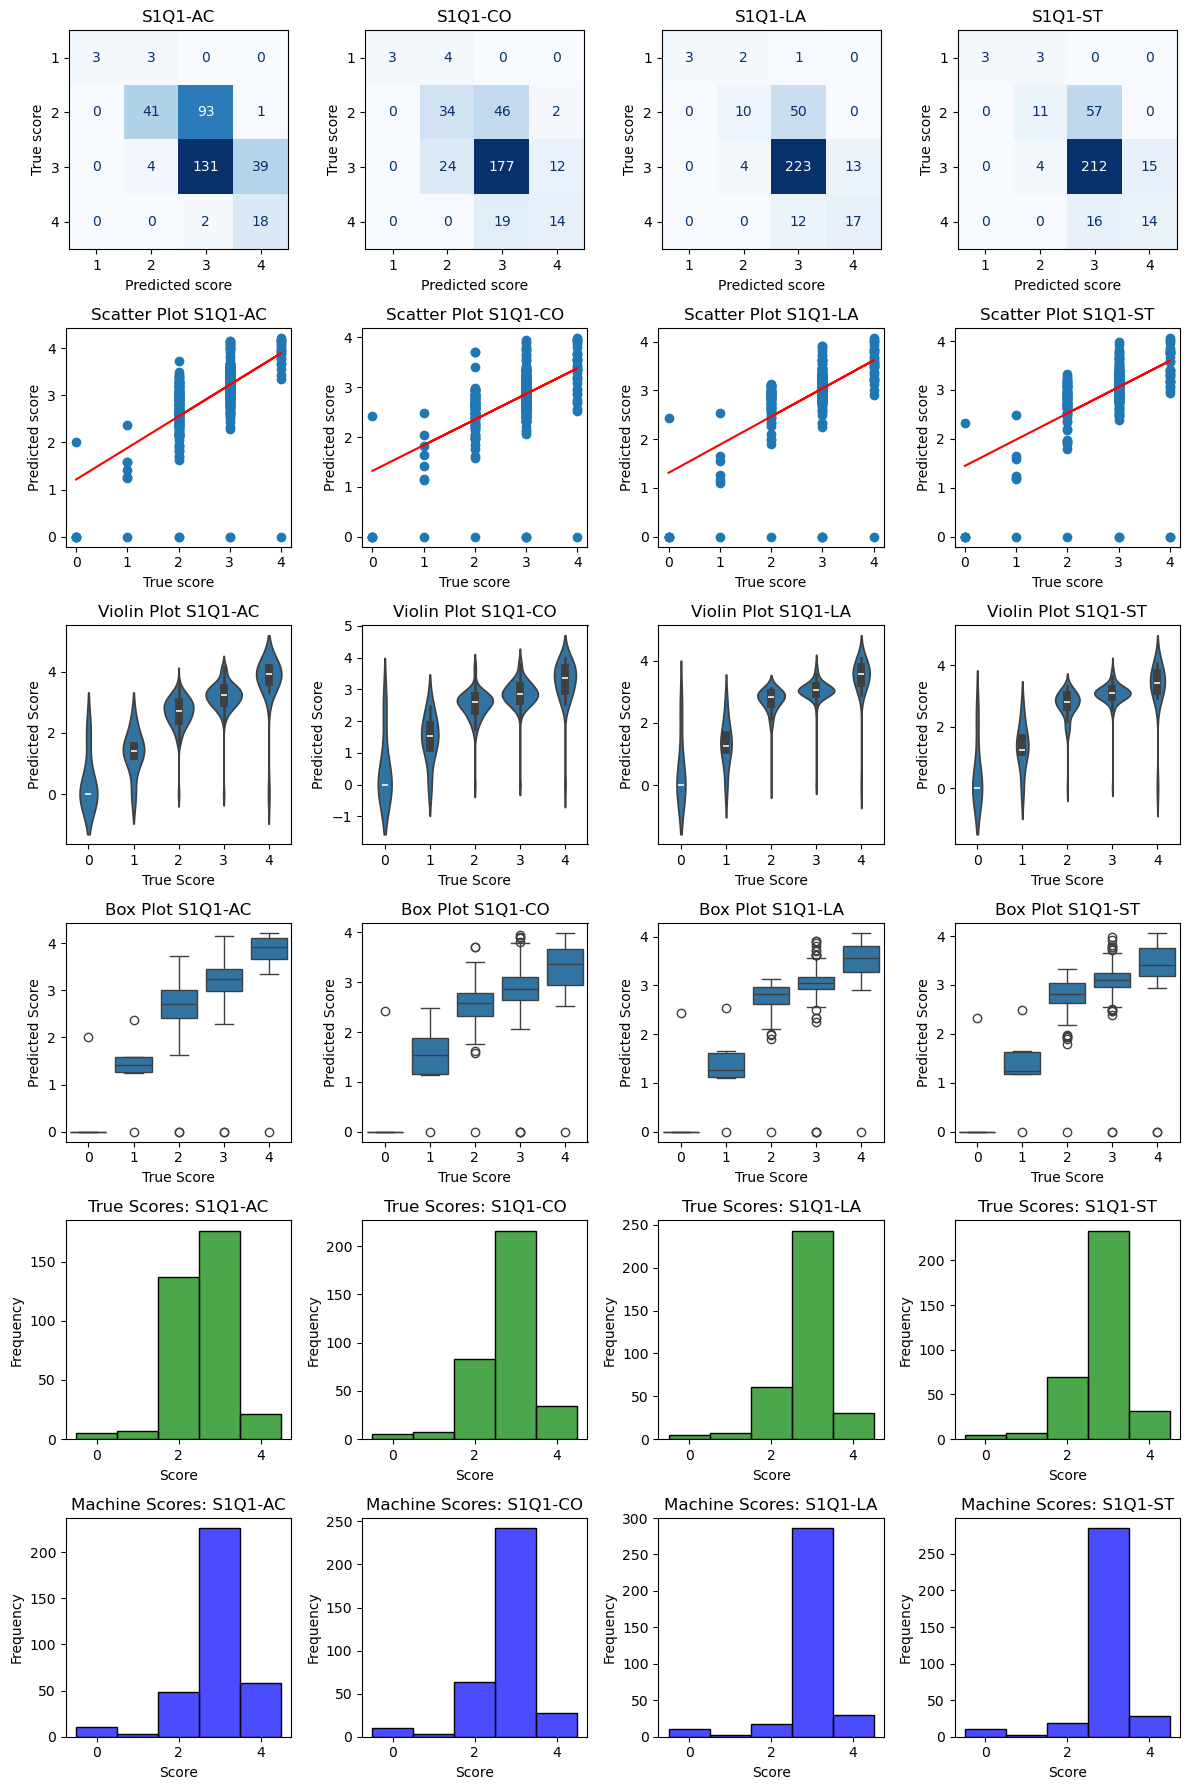

In [46]:
#generate plots for Q1
titles = ["S1Q1-AC", "S1Q1-CO", "S1Q1-LA", "S1Q1-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt_baseline, titles, columns)


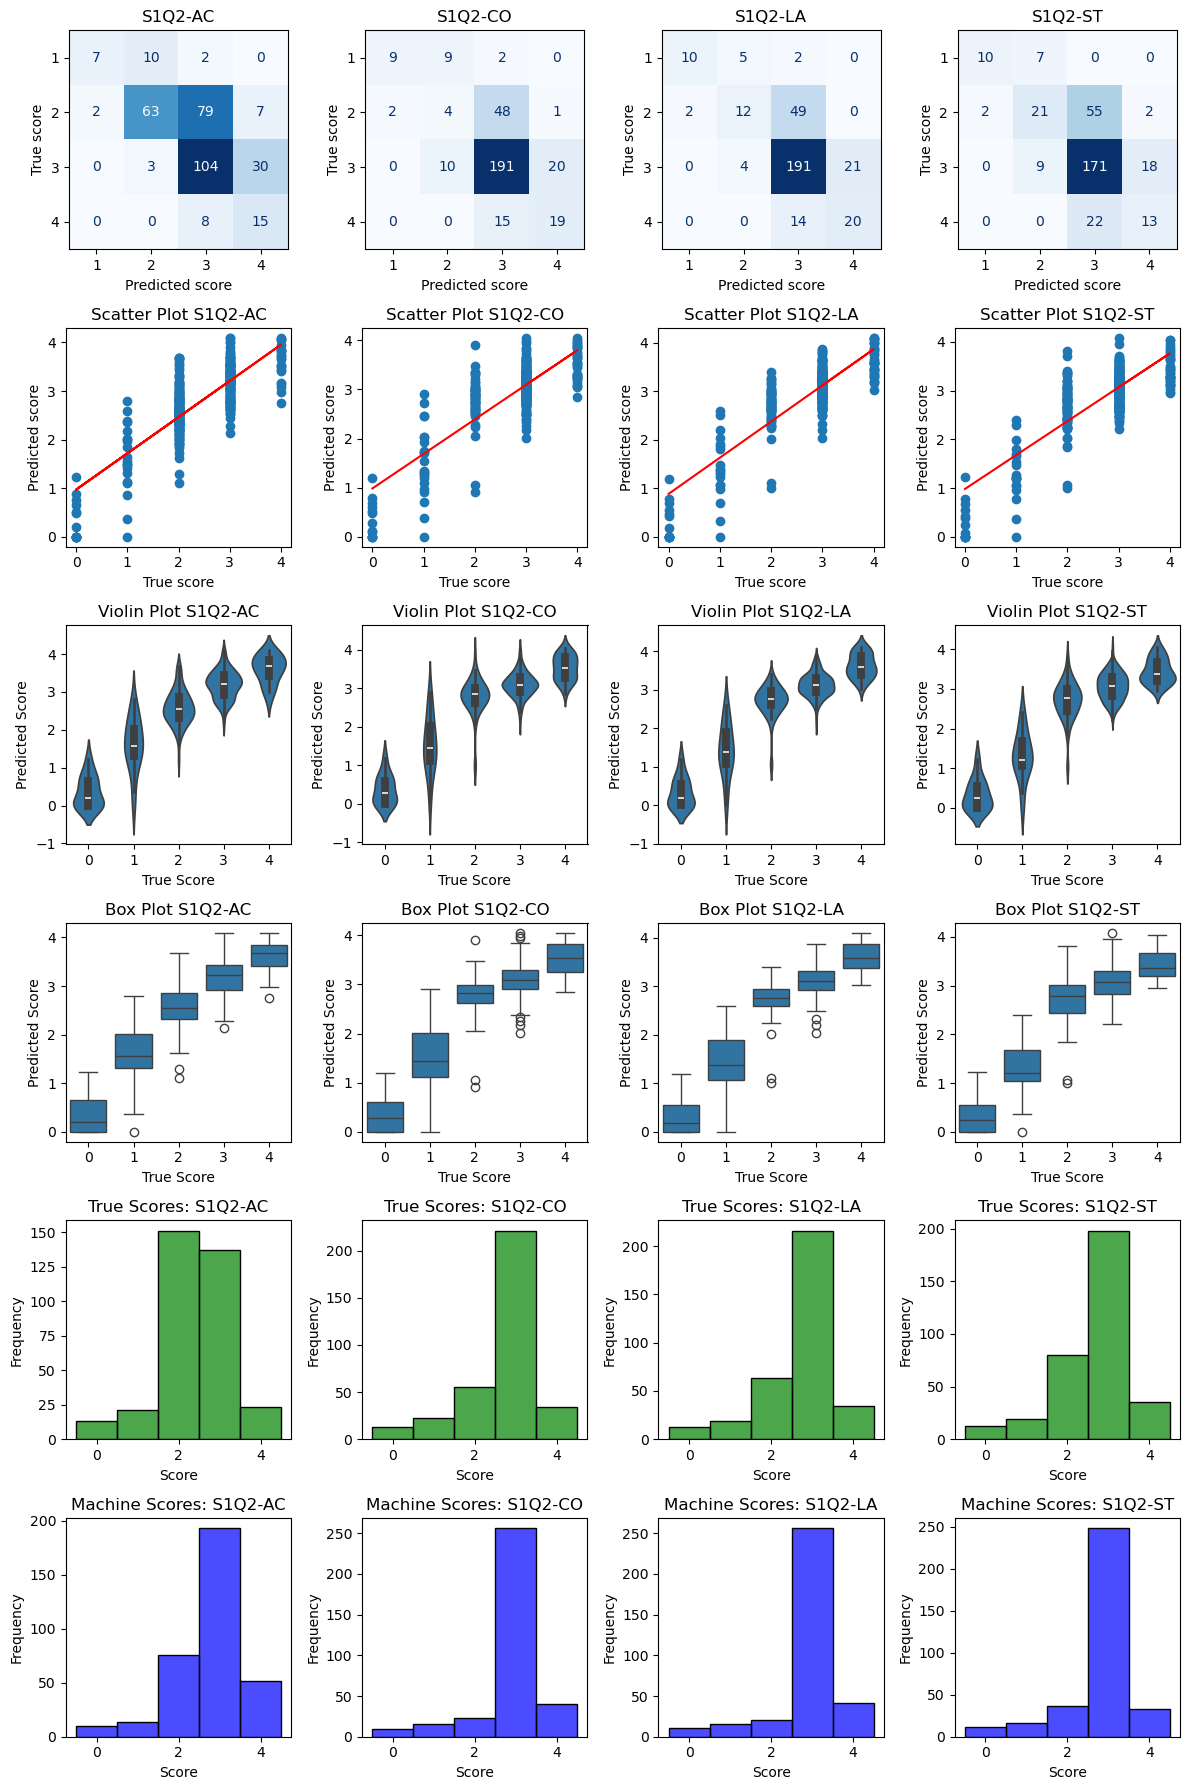

In [47]:
#generate plots for Q2
titles = ["S1Q2-AC", "S1Q2-CO", "S1Q2-LA", "S1Q2-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt_baseline1, titles, columns)


In [50]:
dt_baseline_ac_float = pd.read_csv("output/predictions/bert-single/_ACtest_Q1_bertbasev1_seed589_float.csv")
dt_baseline_ac_float

,Unique_ID,score_pred_float
0,6817958868,1.862659
1,6814214682,2.079126
2,6810653345,3.250547
3,6773279851,3.264650
4,6895156445,3.492287
...,...,...
341,6816733423,0.000000
342,6895154957,0.000000
343,6903135974,0.000000
344,6813826539,0.000000


In [112]:
# analyse the baseline-single-output model performance
dt_baseline_ac = pd.read_csv("output/predictions/bert-single/_ACtest_Q1_bertbasev1_seed589_AC.csv")
dt_baseline_ac = dt_baseline_ac[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_ac.columns = ['Unique_ID', 'AC_pred', 'AC_true']
dt_baseline_co = pd.read_csv("output/predictions/bert-single/_COtest_Q1_bertbasev1_seed589_CO.csv")
dt_baseline_co = dt_baseline_co[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_co.columns = ['Unique_ID', 'CO_pred', 'CO_true']
dt_baseline_la = pd.read_csv("output/predictions/bert-single/_LAtest_Q1_bertbasev1_seed589_LA.csv")
dt_baseline_la = dt_baseline_la[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_la.columns = ['Unique_ID', 'LA_pred', 'LA_true']
dt_baseline_st = pd.read_csv("output/predictions/bert-single/_STtest_Q1_bertbasev1_seed589_ST.csv")
dt_baseline_st = dt_baseline_st[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_st.columns = ['Unique_ID', 'ST_pred', 'ST_true']
dt_baseline_ac_float = pd.read_csv("output/predictions/bert-single/_ACtest_Q1_bertbasev1_seed589_float.csv")
dt_baseline_ac_float.columns = ['Unique_ID', 'AC_pred_float']
dt_baseline_co_float = pd.read_csv("output/predictions/bert-single/_COtest_Q1_bertbasev1_seed589_float.csv")
dt_baseline_co_float.columns = ['Unique_ID', 'CO_pred_float']
dt_baseline_la_float = pd.read_csv("output/predictions/bert-single/_LAtest_Q1_bertbasev1_seed589_float.csv")
dt_baseline_la_float.columns = ['Unique_ID', 'LA_pred_float']
dt_baseline_st_float = pd.read_csv("output/predictions/bert-single/_STtest_Q1_bertbasev1_seed589_float.csv")
dt_baseline_st_float.columns = ['Unique_ID', 'ST_pred_float']
#adde a column total_true and total_pred where total_true = AC_true+CO_true+LA_true+ST_true
#dt_baseline_ac['total_true'] = dt_baseline_ac['AC_true']+dt_baseline_co['CO_true']+dt_baseline_la['LA_true']+dt_baseline_st['ST_true']
#dt_baseline_ac['total_pred'] = dt_baseline_ac['AC_pred']+dt_baseline_co['CO_pred']+dt_baseline_la['LA_pred']+dt_baseline_st['ST_pred']

dt_baseline = pd.merge(dt_baseline_ac, dt_baseline_ac_float, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_co, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_co_float, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_la, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_la_float, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_st, on="Unique_ID")
dt_baseline = pd.merge(dt_baseline, dt_baseline_st_float, on="Unique_ID")

#add a column total_true and total_pred where total_true = AC_true+CO_true+LA_true+ST_true
dt_baseline['total_true'] = dt_baseline['AC_true']+dt_baseline['CO_true']+dt_baseline['LA_true']+dt_baseline['ST_true']
dt_baseline['total_pred'] = dt_baseline['AC_pred']+dt_baseline['CO_pred']+dt_baseline['LA_pred']+dt_baseline['ST_pred']


In [133]:
#get the stats
columns = ['AC', 'CO', 'LA', 'ST','total']
stats_bert_single = get_stats(dt_baseline, "S2Q1",columns)
stats_bert_single.to_csv(save_path + "S2Q1_stats_bert_single.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [114]:
#read the Q2 data
dt_baseline_ac1 = pd.read_csv("output/predictions/bert-single/_ACtest_Q2_bertbasev1_seed589_AC.csv")
dt_baseline_ac1 = dt_baseline_ac1[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_ac1.columns = ['Unique_ID', 'AC_pred', 'AC_true']
dt_baseline_co1 = pd.read_csv("output/predictions/bert-single/_COtest_Q2_bertbasev1_seed589_CO.csv")
dt_baseline_co1 = dt_baseline_co1[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_co1.columns = ['Unique_ID', 'CO_pred', 'CO_true']
dt_baseline_la1 = pd.read_csv("output/predictions/bert-single/_LAtest_Q2_bertbasev1_seed589_LA.csv")
dt_baseline_la1 = dt_baseline_la1[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_la1.columns = ['Unique_ID', 'LA_pred', 'LA_true']
dt_baseline_st1 = pd.read_csv("output/predictions/bert-single/_STtest_Q2_bertbasev1_seed589_ST.csv")
dt_baseline_st1 = dt_baseline_st1[['Unique_ID', 'score_pred', 'score_true']]
dt_baseline_st1.columns = ['Unique_ID', 'ST_pred', 'ST_true']
dt_baseline_ac_float1 = pd.read_csv("output/predictions/bert-single/_ACtest_Q2_bertbasev1_seed589_float.csv")
dt_baseline_ac_float1.columns = ['Unique_ID', 'AC_pred_float']
dt_baseline_co_float1 = pd.read_csv("output/predictions/bert-single/_COtest_Q2_bertbasev1_seed589_float.csv")
dt_baseline_co_float1.columns = ['Unique_ID', 'CO_pred_float']
dt_baseline_la_float1 = pd.read_csv("output/predictions/bert-single/_LAtest_Q2_bertbasev1_seed589_float.csv")
dt_baseline_la_float1.columns = ['Unique_ID', 'LA_pred_float']
dt_baseline_st_float1 = pd.read_csv("output/predictions/bert-single/_STtest_Q2_bertbasev1_seed589_float.csv")
dt_baseline_st_float1.columns = ['Unique_ID', 'ST_pred_float']

dt_baseline1 = pd.merge(dt_baseline_ac1, dt_baseline_ac_float1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_co1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_co_float1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_la1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_la_float1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_st1, on="Unique_ID")
dt_baseline1 = pd.merge(dt_baseline1, dt_baseline_st_float1, on="Unique_ID")

#adde a column total_true and total_pred where total_true = AC_true+CO_true+LA_true+ST_true
dt_baseline1['total_true'] = dt_baseline1['AC_true']+dt_baseline1['CO_true']+dt_baseline1['LA_true']+dt_baseline1['ST_true']
dt_baseline1['total_pred'] = dt_baseline1['AC_pred']+dt_baseline1['CO_pred']+dt_baseline1['LA_pred']+dt_baseline1['ST_pred']


In [139]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST', 'total']
stats_bert_single1 = get_stats(dt_baseline1,"S2Q2", columns)
stats_bert_single1.to_csv(save_path + "S2Q2_stats_bert_single.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2   SDsc  Pearson  Kappa  \
0  S2Q1     AC  346  0.694  0.303      0.997  0.003  0.000    0.696  0.472   
1  S2Q1     CO  346  0.697  0.292      0.989  0.009  0.003    0.636  0.374   
2  S2Q1     LA  346  0.769  0.225      0.994  0.003  0.003    0.692  0.435   
3  S2Q1     ST  346  0.740  0.257      0.997  0.000  0.003    0.683  0.402   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.687  0.309     0.694     0.476         2.694       0.709      2.581   
1    0.617  0.318     0.697     0.396         2.913       0.626      2.769   
2    0.675  0.240     0.769     0.456         2.945       0.595      2.827   
3    0.664  0.266     0.740     0.425         2.936       0.601      2.809   

   sd_true  effect_size  
0    0.702        0.160  
1    0.713        0.215  
2    0.667        0.187  
3    0.684        0.197  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


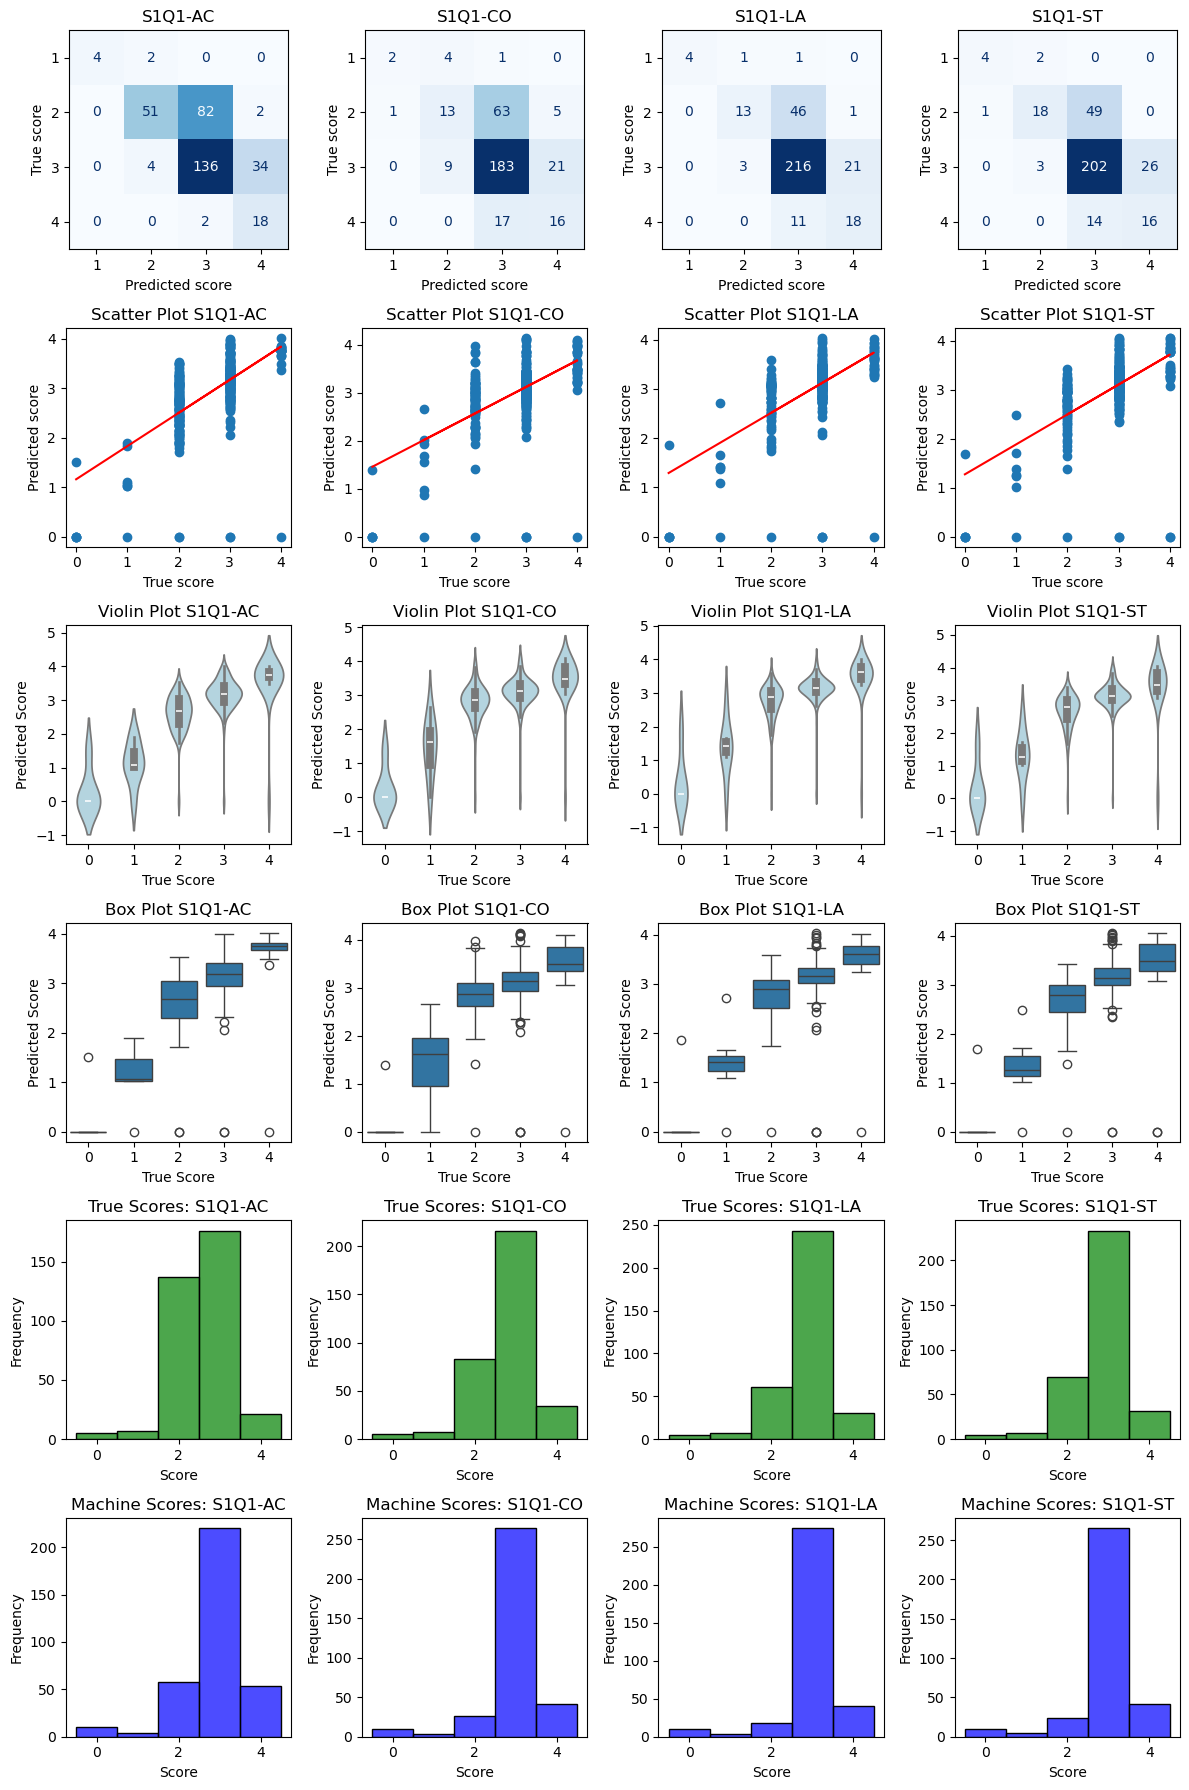

In [92]:
# generate plots for Q1
titles = ["S1Q1-AC", "S1Q1-CO", "S1Q1-LA", "S1Q1-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt_baseline, titles, columns)


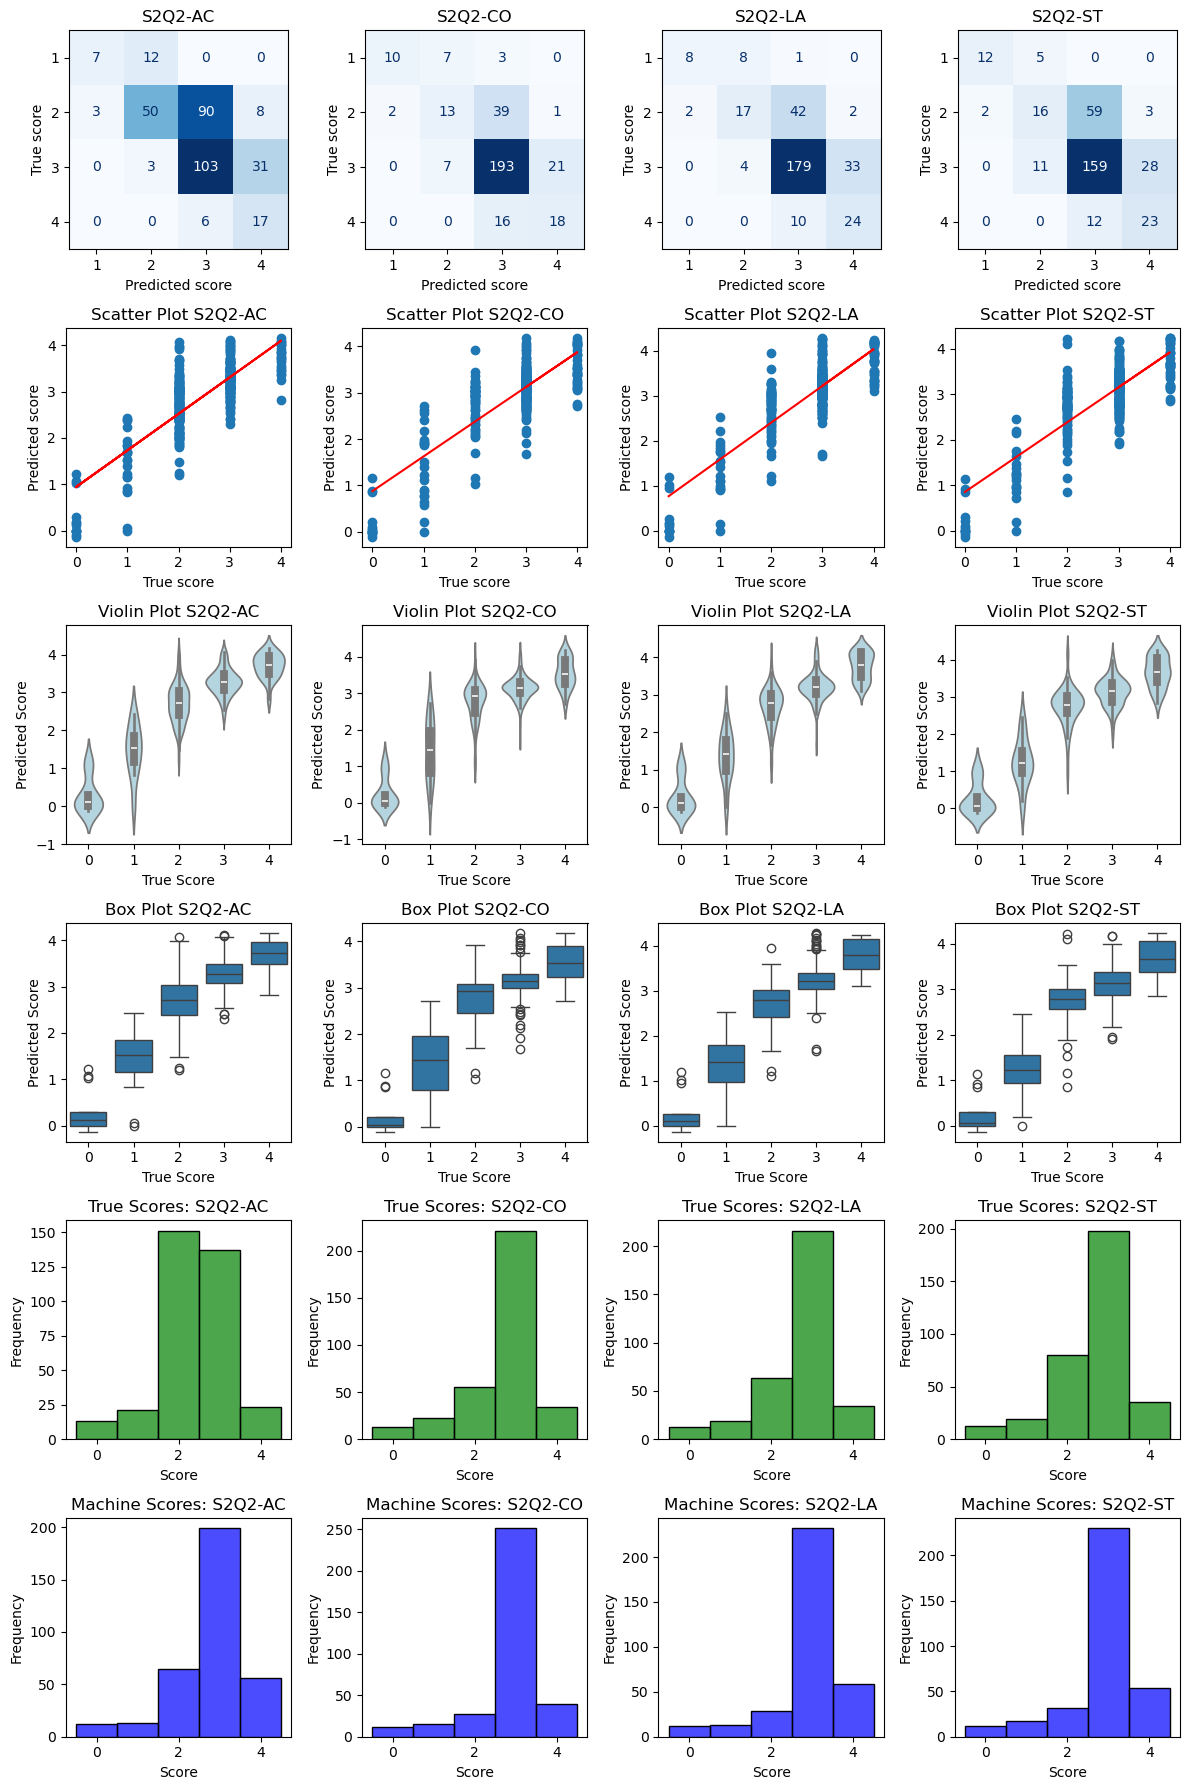

In [91]:
# generate plots for Q2	
titles = ["S2Q2-AC", "S2Q2-CO", "S2Q2-LA", "S2Q2-ST"]
columns = ['AC', 'CO', 'LA', 'ST']
generate_plots(dt_baseline1, titles, columns)

In [116]:
dt_vendor = pd.read_csv(data_path + "S2Q1_scores_final_with_vendor.csv")
dt_vendor1 = pd.read_csv(data_path + "S2Q2_scores_final_with_vendor.csv")
#select column ac_true, vender_ac, co_true, vender_co, la_true, vender_la, st_true, vender_st
dt_vendor = dt_vendor[['Unique_ID', 'AC_true', 'CO_true', 'LA_true','ST_true', 'Vendor_AC', 'Vendor_CO', 'Vendor_LA', 'Vendor_ST']]
dt_vendor1 = dt_vendor1[['Unique_ID', 'AC_true', 'CO_true', 'LA_true','ST_true', 'Vendor_AC', 'Vendor_CO', 'Vendor_LA', 'Vendor_ST']]

#rename Vendor_AC to AC_true, Vendor_CO to CO_true, Vendor_LA to LA_true, Vendor_ST to ST_true
dt_vendor.columns = ['Unique_ID', 'AC_true', 'CO_true', 'LA_true','ST_true', 'AC_pred', 'CO_pred', 'LA_pred', 'ST_pred']
dt_vendor1.columns = ['Unique_ID', 'AC_true', 'CO_true', 'LA_true','ST_true', 'AC_pred', 'CO_pred', 'LA_pred', 'ST_pred']   

In [132]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST']
stats_vendor = get_stats(dt_vendor, "S2Q1",columns)
stats_vendor.to_csv(save_path + "S2Q1_stats_vendor.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [131]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST']
stats_vendor1 = get_stats(dt_vendor1, "S2Q2" ,columns)
stats_vendor1.to_csv(save_path + "S2Q2_stats_vendor.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [119]:
dt_hybrid = pd.read_csv("output/predictions/hybrid/test_Q1_hybridv2_seed589.csv")
dt_hybrid1 = pd.read_csv("output/predictions/hybrid/test_Q2_hybridv2_seed589.csv")
dt_hybrid_float = pd.read_csv("output/predictions/hybrid/test_Q1_hybridv2_seed589_float.csv")
dt_hybrid1_float = pd.read_csv("output/predictions/hybrid/test_Q2_hybridv2_seed589_float.csv")


In [130]:
#get the stats for Q1
columns = ['AC', 'CO', 'LA', 'ST']
stats_hybrid = get_stats(dt_hybrid, "S2Q1",columns)
stats_hybrid.to_csv(save_path + "S2Q1_stats_hybrid.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [129]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST']
stats_hybrid1 = get_stats(dt_hybrid1, "S2Q2",columns)
stats_hybrid1.to_csv(save_path + "S2Q2_stats_hybrid.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [122]:
dt_hybrid_sb = pd.read_csv("output/predictions/hybridsb/test_Q1_sbv2_seed589.csv")
dt_hybrid_sb1 = pd.read_csv("output/predictions/hybridsb/test_Q2_sbv2_seed589.csv")
dt_hybrid_sb_float = pd.read_csv("output/predictions/hybridsb/test_Q1_sbv2_seed589_float.csv")
dt_hybrid_sb1_float = pd.read_csv("output/predictions/hybridsb/test_Q2_sbv2_seed589_float.csv")


In [128]:
#get the stats for Q1
columns = ['AC', 'CO', 'LA', 'ST']
stats_hybrid_sb = get_stats(dt_hybrid_sb, "S2Q1",columns)
stats_hybrid_sb.to_csv(save_path + "S2Q1_stats_hybrid_sb.csv")
print(stats)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [127]:
#get the stats for Q2
columns = ['AC', 'CO', 'LA', 'ST']
stats_hybrid_sb1 = get_stats(dt_hybrid_sb1, "S2Q2",columns)
stats_hybrid_sb1.to_csv(save_path + "S2Q2_stats_hybrid_sb.csv")
print(stats_hybrid_sb1)

  Essay Rubric    N  Exact    Adj  Exact+Adj   Off2  SDsc  Pearson  Kappa  \
0  S2Q2     AC  345  0.667  0.333      1.000  0.000   0.0    0.778  0.479   
1  S2Q2     CO  345  0.716  0.275      0.991  0.009   0.0    0.794  0.415   
2  S2Q2     LA  345  0.733  0.264      0.997  0.003   0.0    0.814  0.456   
3  S2Q2     ST  345  0.672  0.322      0.994  0.006   0.0    0.780  0.404   

   QWKappa    MAE  Accuracy  Matthews  mean_machine  sd_machine  mean_true  \
0    0.768  0.333     0.667     0.496         2.525       0.839      2.394   
1    0.783  0.293     0.716     0.433         2.823       0.807      2.699   
2    0.805  0.270     0.733     0.485         2.806       0.811      2.693   
3    0.767  0.333     0.672     0.425         2.794       0.832      2.646   

   sd_true  effect_size  
0    0.850        0.155  
1    0.874        0.147  
2    0.865        0.135  
3    0.877        0.173  


C:\Users\JessieDong\AppData\Local\Temp\ipykernel_25492\2644291588.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [140]:
#concatenate the dataframes
stats_all = pd.concat([stats_bert_single, stats_bert_multi,  stats_hybrid, stats_hybrid_sb,stats,stats_vendor])
stats_all1 = pd.concat([stats_bert_single1, stats_bert_multi1,  stats_hybrid1, stats_hybrid_sb1,stats1,stats_vendor1])
stats_all.to_csv(save_path + "S2Q1_all_stats.csv")
stats_all1.to_csv(save_path + "S2Q2_all_stats.csv")